In [1]:
#Introduction to data science final project
#https://www.kaggle.com/nycopendata/high-schools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns

plt.style.use("classic")

sns.set()
%matplotlib inline
plt.style.use("seaborn")

In [22]:
#read in the csv file
score = pd.read_csv("NYCScores.csv")

In [23]:
#show first five items
score.head()

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,0.666667,1735,0.286,0.133,0.180,0.385,657,601,601,0.910
1,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,0.614583,358,0.117,0.385,0.413,0.059,395,411,387,0.789
2,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,0.625000,383,0.031,0.282,0.569,0.086,418,428,415,0.651
3,02M545,High School for Dual Language and Asian Studies,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,0.649306,416,0.017,0.031,0.055,0.889,613,453,463,0.959
4,01M292,Henry Street School for International Studies,Manhattan,M056,220 Henry Street,Manhattan,NY,10002,40.71376,-73.98526,...,0.645833,255,0.039,0.244,0.566,0.132,410,406,381,0.597


In [24]:
#the dataset included an array of variables that were not necessary for my analysis and therefore were dropped
#to make viewing the dataset easier
score = score.drop("School ID", axis = 1)
score = score.drop("School Name", axis = 1)
score = score.drop("Borough", axis = 1)
score = score.drop("Building Code", axis = 1)
score = score.drop("Street Address", axis = 1)
score = score.drop("City", axis = 1)
score = score.drop("State", axis = 1)
score = score.drop("Zip Code", axis = 1)
score = score.drop("Latitude", axis = 1)
score = score.drop("Longitude", axis = 1)
score = score.drop("Phone Number", axis = 1)
score = score.drop("Start Time", axis = 1)
score = score.drop("End Time", axis = 1)


In [26]:
#Show first five values of the new dataset
score.head()

,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,1735,0.286,0.133,0.180,0.385,657,601,601,0.910
1,358,0.117,0.385,0.413,0.059,395,411,387,0.789
2,383,0.031,0.282,0.569,0.086,418,428,415,0.651
3,416,0.017,0.031,0.055,0.889,613,453,463,0.959
4,255,0.039,0.244,0.566,0.132,410,406,381,0.597


In [27]:
#I have decided that any rows that contain NaN shuld be removed from the dataset so as to not skew any of the results
score.dropna(0)

,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,1735,0.286,0.133,0.180,0.385,657,601,601,0.910
1,358,0.117,0.385,0.413,0.059,395,411,387,0.789
2,383,0.031,0.282,0.569,0.086,418,428,415,0.651
3,416,0.017,0.031,0.055,0.889,613,453,463,0.959
4,255,0.039,0.244,0.566,0.132,410,406,381,0.597
5,545,0.453,0.172,0.187,0.171,634,641,639,0.708
6,329,0.027,0.419,0.492,0.058,389,395,381,0.808
7,363,0.025,0.399,0.512,0.058,438,413,394,0.356
8,304,0.033,0.250,0.411,0.299,437,355,352,0.699
9,441,0.039,0.308,0.569,0.059,381,396,372,0.737


In [74]:
#Create an Ordinary Least Squares summary table
X = score[["Percent White", "Percent Black", "Percent Hispanic", "Percent Asian"]]
Y = score["Average Score (SAT Math)"]

model = sm.OLS(Y,X).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Average Score (SAT Math)   R-squared:                       0.989
Model:                                  OLS   Adj. R-squared:                  0.989
Method:                       Least Squares   F-statistic:                     9080.
Date:                      Fri, 14 Dec 2018   Prob (F-statistic):               0.00
Time:                              14:53:50   Log-Likelihood:                -2117.9
No. Observations:                       404   AIC:                             4244.
Df Residuals:                           400   BIC:                             4260.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

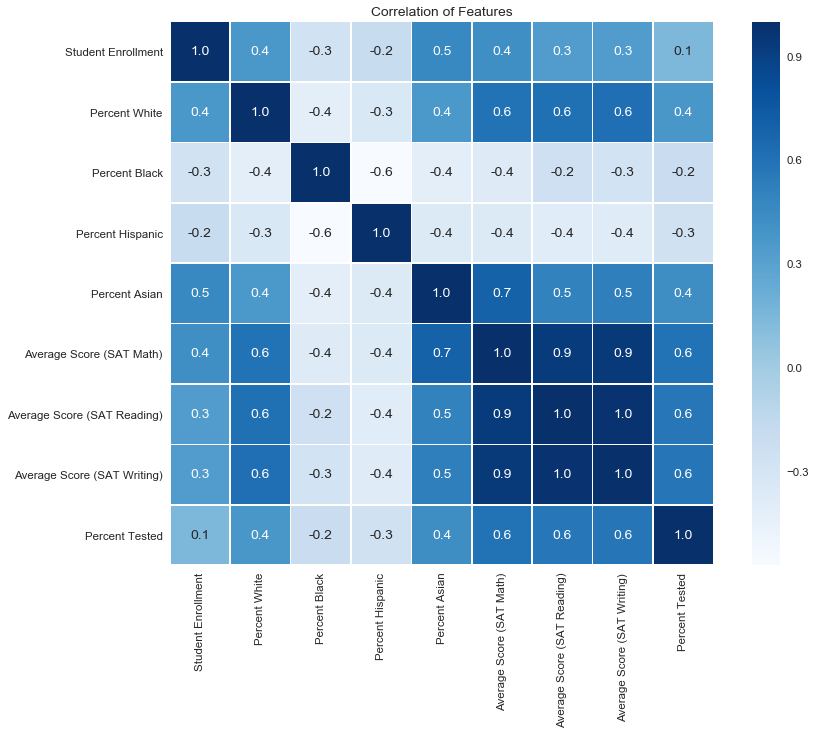

In [29]:
#Create a heat map for a correlation matrix to determine the relationship between each variable
sns.set(font_scale = 1.15)
plt.figure(figsize = (14, 10))

sns.heatmap(score.corr(), vmax = 1, linewidths = 0.5, fmt= ".1f",
            square = True, annot = True, cmap = "Blues", linecolor = "white")
plt.title("Correlation of Features");

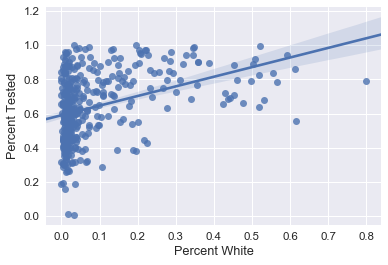

In [30]:
#create a line of best fit for "Percent Tested" and "Percent White"
sns.regplot(x=score["Percent White"], y=score["Percent Tested"])

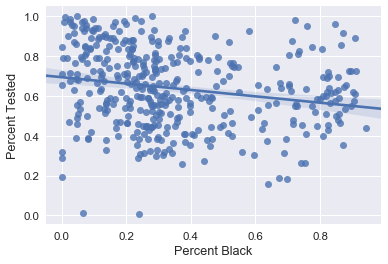

In [31]:
#create a line of best fit for "Percent Tested" and "Percent Black"
sns.regplot(x=score["Percent Black"], y=score["Percent Tested"])

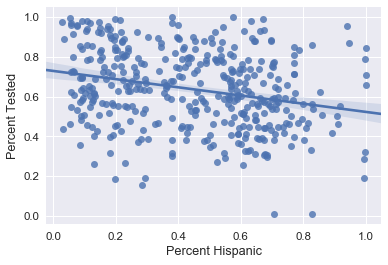

In [32]:
#create a line of best fit for "Percent Tested" and "Percent Hispanic"
sns.regplot(x=score["Percent Hispanic"], y=score["Percent Tested"])

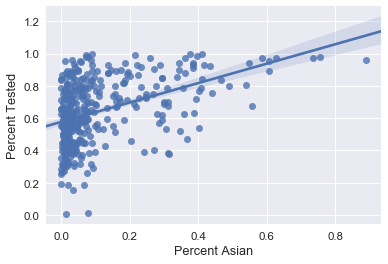

In [33]:
#create a line of best fit for "Percent Tested" and "Percent Asian"
sns.regplot(x=score["Percent Asian"], y=score["Percent Tested"])

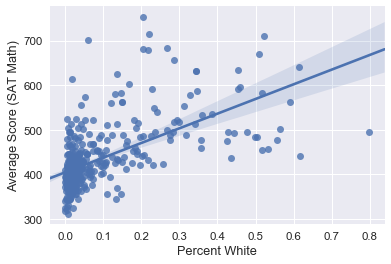

In [34]:
#create a line of best fit for "Average Score (SAT Math)" and "Percent White"
sns.regplot(x=score["Percent White"], y=score["Average Score (SAT Math)"])

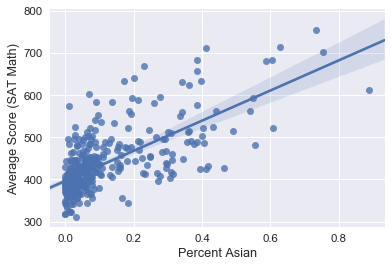

In [35]:
#create a line of best fit for "Average Score (SAT Math)" and "Percent Asian"
sns.regplot(x=score["Percent Asian"], y=score["Average Score (SAT Math)"])

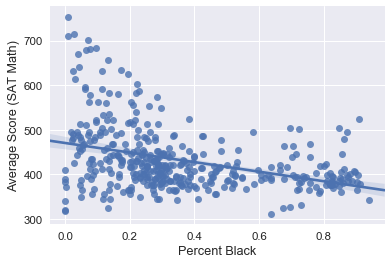

In [36]:
#create a line of best fit for "Average Score (SAT Math)" and "Percent Black"
sns.regplot(x=score["Percent Black"], y=score["Average Score (SAT Math)"])

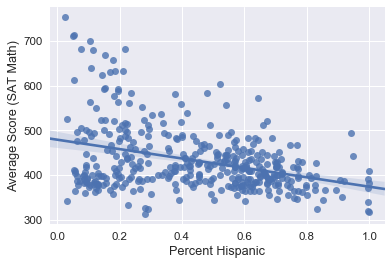

In [37]:
#create a line of best fit for "Average Score (SAT Math)" and "Percent Hispanic"
sns.regplot(x=score["Percent Hispanic"], y=score["Average Score (SAT Math)"])

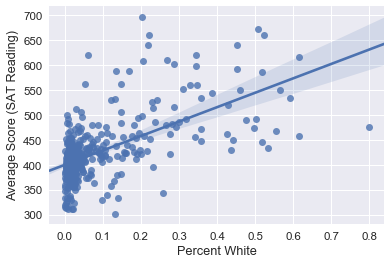

In [38]:
#create a line of best fit for "Average Score (SAT Reading)" and "Percent White"
sns.regplot(x=score["Percent White"], y=score["Average Score (SAT Reading)"])

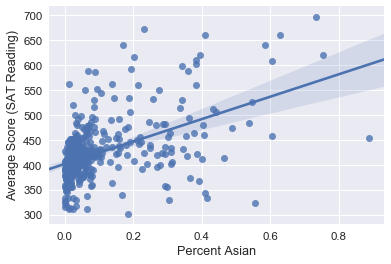

In [39]:
#create a line of best fit for "Average Score (SAT Reading)" and "Percent Asian"
sns.regplot(x=score["Percent Asian"], y=score["Average Score (SAT Reading)"])

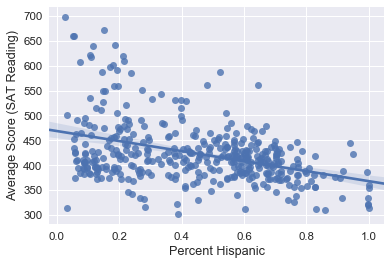

In [40]:
#create a line of best fit for "Average Score (SAT Reading)" and "Percent Hispanic"
sns.regplot(x=score["Percent Hispanic"], y=score["Average Score (SAT Reading)"])

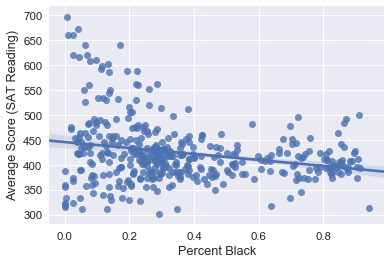

In [41]:
#create a line of best fit for "Average Score (SAT Reading)" and "Percent Black"
sns.regplot(x=score["Percent Black"], y=score["Average Score (SAT Reading)"])

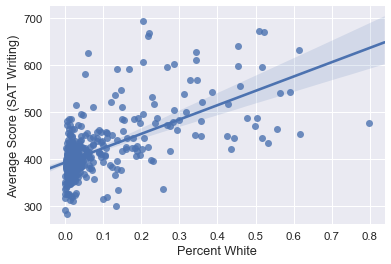

In [42]:
#create a line of best fit for "Average Score (SAT Writing)" and "Percent White"
sns.regplot(x=score["Percent White"], y=score["Average Score (SAT Writing)"])

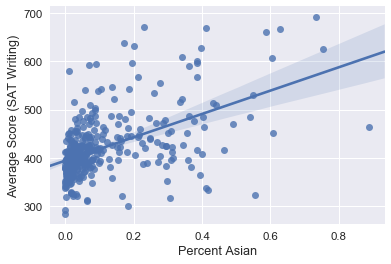

In [43]:
#create a line of best fit for "Average Score (SAT Writing)" and "Percent Asian"
sns.regplot(x=score["Percent Asian"], y=score["Average Score (SAT Writing)"])

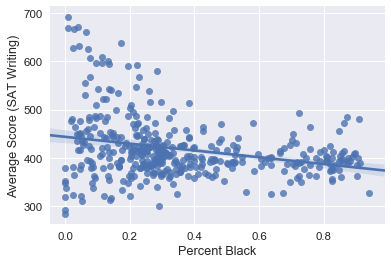

In [44]:
#create a line of best fit for "Average Score (SAT Writing)" and "Percent Black"
sns.regplot(x=score["Percent Black"], y=score["Average Score (SAT Writing)"])

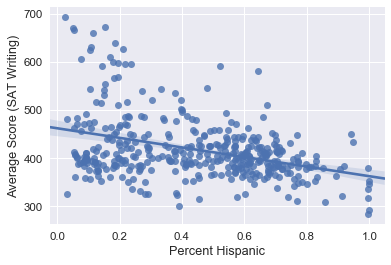

In [45]:
#create a line of best fit for "Average Score (SAT Writing)" and "Percent Hispanic"
sns.regplot(x=score["Percent Hispanic"], y=score["Average Score (SAT Writing)"])

In [48]:
#Determine the independent and dependent variables for a multiple linear regression
feature_cols = ["Percent White", "Percent Asian", "Percent Hispanic", "Percent Black"]
label_cols = ["Average Score (SAT Writing)"]
X = score[feature_cols]
Y = score[label_cols]

In [49]:
#split data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [50]:
#create a liear regression from training data
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
result = linreg.fit(X_train, Y_train)

In [51]:
#the accuracy of the linear regression
result.score(X_train, Y_train)

0.4889540967910559

In [52]:
#the intercept value
print(linreg.intercept_)

[925.32967018]


In [53]:
#coefficients for each variable
print(linreg.coef_)

[[-324.02709344 -400.0862208  -556.15984416 -544.0320192 ]]


In [54]:
#Predict values using linear regression
Y_pred = linreg.predict(X_test)

In [55]:
#print predictor values
from sklearn import metrics
print(metrics.mean_absolute_error(Y_test, Y_pred))
print(metrics.mean_squared_error(Y_test, Y_pred))
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

27.379168596415465
1383.8096698401637
37.19959233432758


In [56]:
#the following outputs follow the same idea as the ones prior but attempt to determine SAT reading rather than writing
feature_cols = ["Percent White", "Percent Asian", "Percent Hispanic", "Percent Black"]
label_cols = ["Average Score (SAT Reading)"]
X = score[feature_cols]
Y = score[label_cols]

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [58]:
linreg = LinearRegression()
result = linreg.fit(X_train, Y_train)

In [59]:
result.score(X_train, Y_train)

0.48664483062523195

In [60]:
print(linreg.intercept_)

[941.33472375]


In [61]:
print(linreg.coef_)

[[-328.93485448 -447.6313135  -569.35279452 -547.40875873]]


In [62]:
Y_pred = linreg.predict(X_test)

In [63]:
print(metrics.mean_absolute_error(Y_test, Y_pred))
print(metrics.mean_squared_error(Y_test, Y_pred))
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

32.048932454896665
2011.5531912208805
44.85034215277383


In [64]:
#the following outputs follow the same idea as the ones prior but attempt to determine SAT math rather than writing
feature_cols = ["Percent White", "Percent Asian", "Percent Hispanic", "Percent Black"]
label_cols = ["Average Score (SAT Math)"]
X = score[feature_cols]
Y = score[label_cols]

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [66]:
linreg = LinearRegression()
result = linreg.fit(X_train, Y_train)

In [67]:
result.score(X_train, Y_train)

0.5792409161423427

In [68]:
print(linreg.intercept_)

[875.84697822]


In [69]:
print(linreg.coef_)

[[-284.56029989 -261.88258114 -496.95829463 -496.23101316]]


In [70]:
Y_pred = linreg.predict(X_test)

In [71]:
print(metrics.mean_absolute_error(Y_test, Y_pred))
print(metrics.mean_squared_error(Y_test, Y_pred))
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

35.96854375711099
2292.4236844435245
47.87926152775881


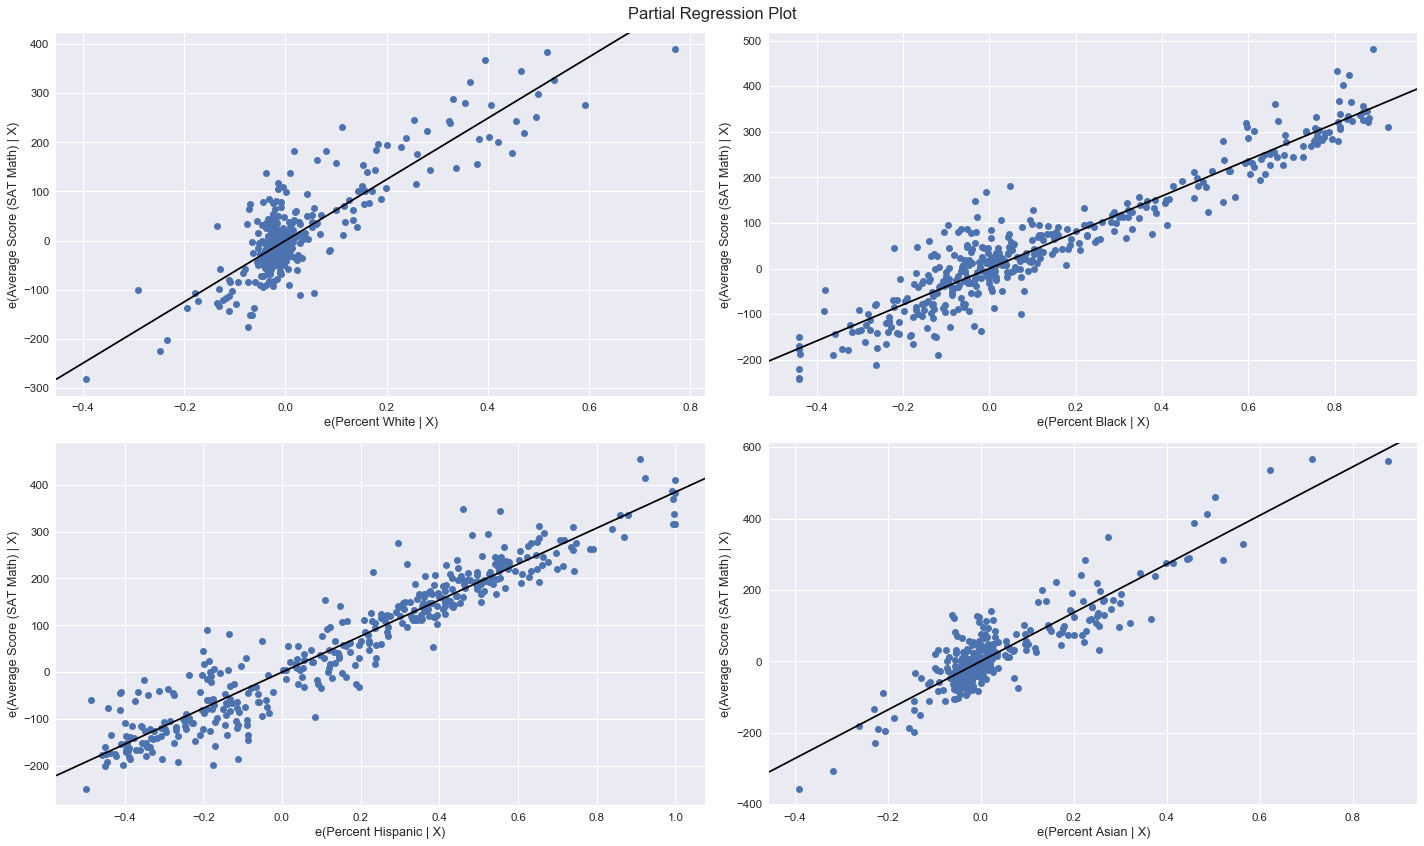

In [72]:
#plot expected SAT math scores given certain race
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

In [75]:
X = score[["Percent White", "Percent Black", "Percent Hispanic", "Percent Asian"]]
YReading = score["Average Score (SAT Reading)"]

model2 = sm.OLS(YReading,X).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Average Score (SAT Math)   R-squared:                       0.989
Model:                                  OLS   Adj. R-squared:                  0.989
Method:                       Least Squares   F-statistic:                     9080.
Date:                      Fri, 14 Dec 2018   Prob (F-statistic):               0.00
Time:                              14:53:57   Log-Likelihood:                -2117.9
No. Observations:                       404   AIC:                             4244.
Df Residuals:                           400   BIC:                             4260.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

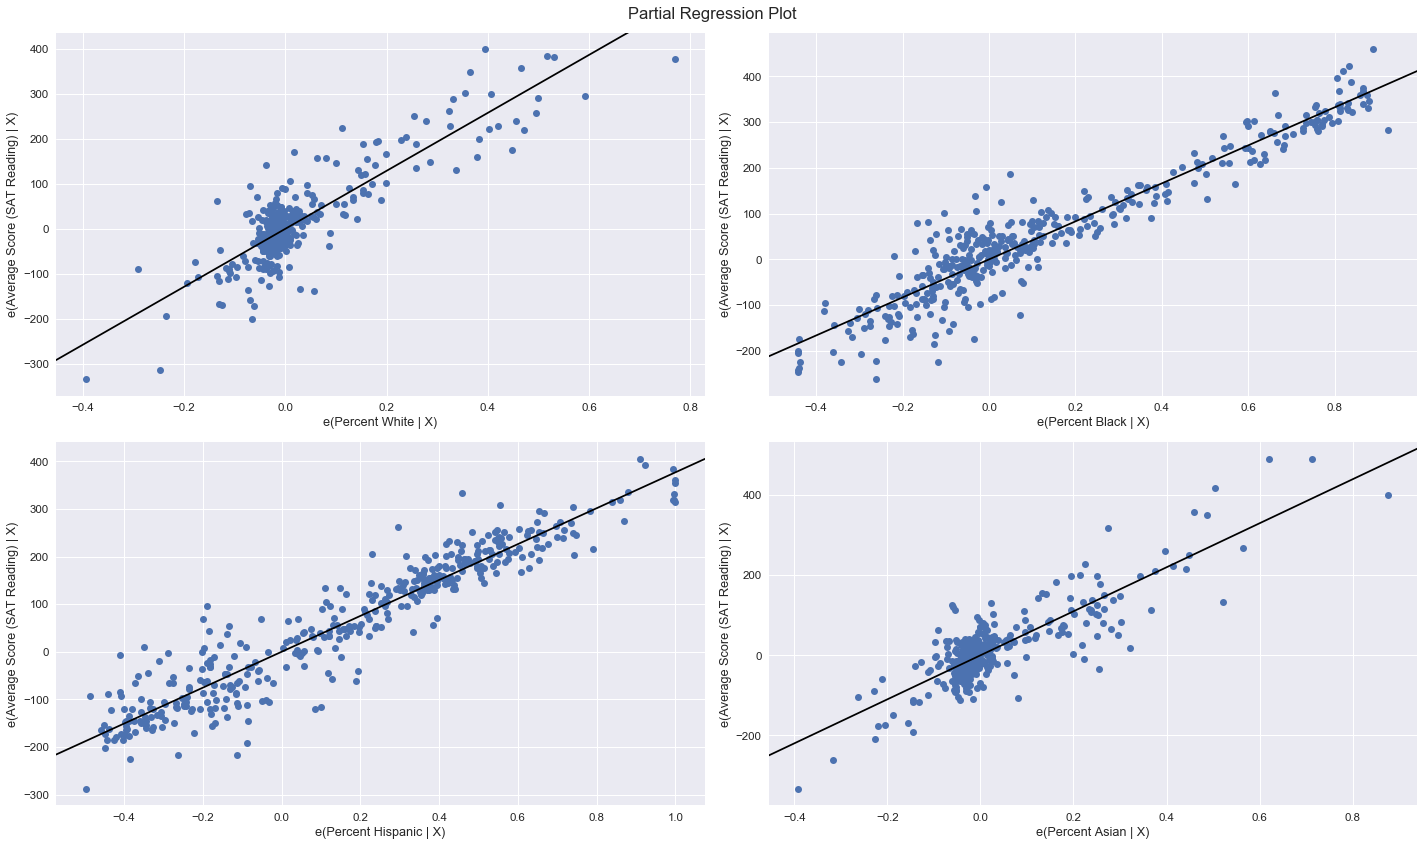

In [76]:
#plot expected SAT reading scores given certain race
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(model2, fig=fig)

In [94]:
X = score[["Percent White", "Percent Black", "Percent Hispanic", "Percent Asian"]]
YWriting = score["Average Score (SAT Writing)"]

model3 = sm.OLS(YWriting,X).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Average Score (SAT Math)   R-squared:                       0.989
Model:                                  OLS   Adj. R-squared:                  0.989
Method:                       Least Squares   F-statistic:                     9080.
Date:                      Fri, 14 Dec 2018   Prob (F-statistic):               0.00
Time:                              18:01:39   Log-Likelihood:                -2117.9
No. Observations:                       404   AIC:                             4244.
Df Residuals:                           400   BIC:                             4260.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

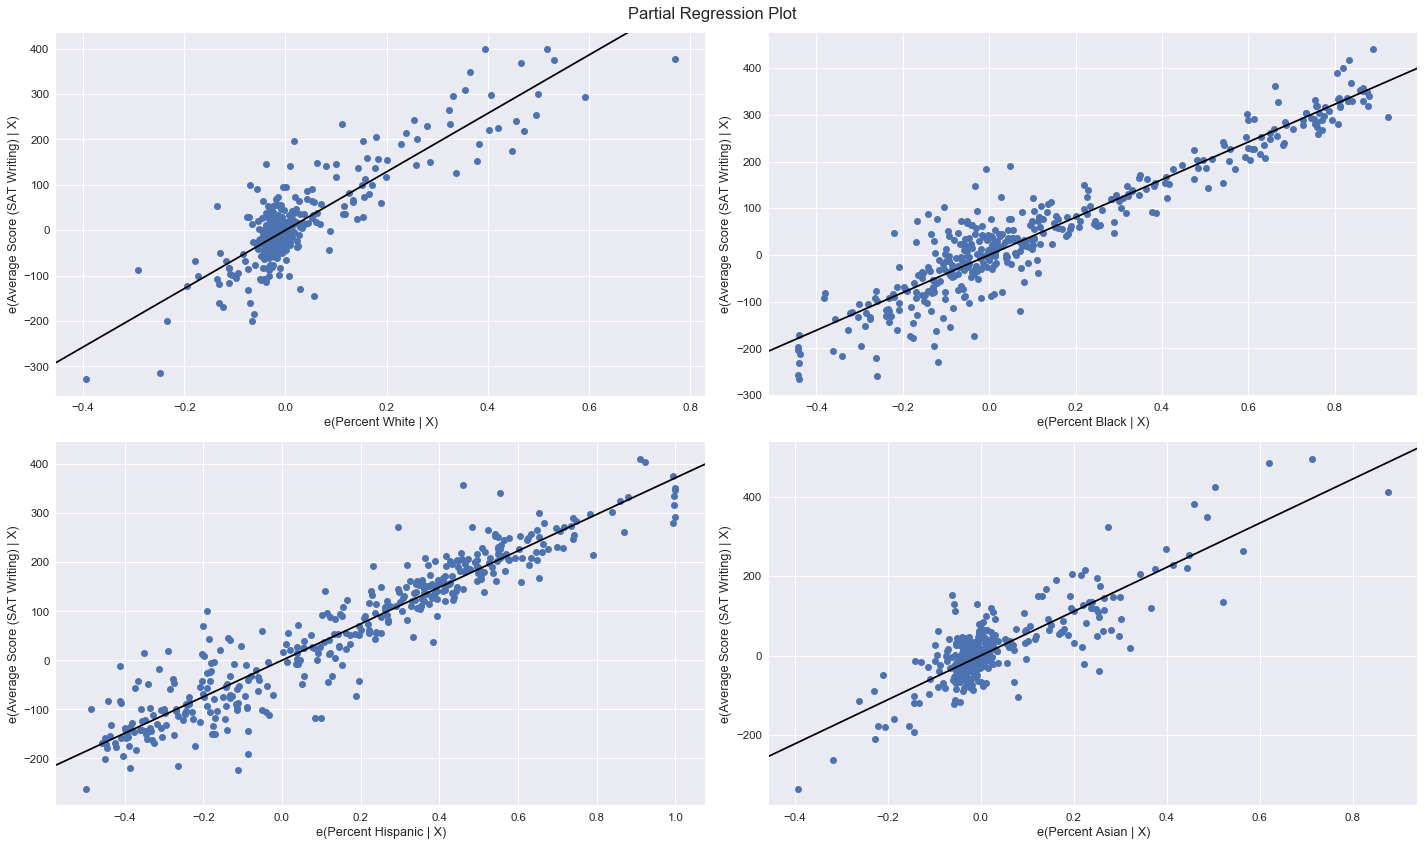

In [95]:
#plot expected SAT writing scores given certain race
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(model3, fig=fig)

In [96]:
X = score[["Percent White", "Percent Black", "Percent Hispanic", "Percent Asian"]]
Yrep = score["Percent Tested"]

model4 = sm.OLS(YWriting,X).fit()
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     Average Score (SAT Math)   R-squared:                       0.989
Model:                                  OLS   Adj. R-squared:                  0.989
Method:                       Least Squares   F-statistic:                     9080.
Date:                      Fri, 14 Dec 2018   Prob (F-statistic):               0.00
Time:                              18:02:25   Log-Likelihood:                -2117.9
No. Observations:                       404   AIC:                             4244.
Df Residuals:                           400   BIC:                             4260.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [99]:
description = score.describe()

In [100]:
#create a descriptive statistics table
description

,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,729.745050,0.085171,0.352916,0.442406,0.101376,432.512376,424.252475,418.378713,0.637955
std,771.791096,0.131077,0.251447,0.244394,0.140140,71.939921,62.366488,64.677805,0.194844
min,92.000000,0.000000,0.000000,0.026000,0.000000,312.000000,302.000000,284.000000,0.008000
25%,375.000000,0.012750,0.167750,0.216750,0.016000,386.000000,386.000000,382.000000,0.498750
50%,473.500000,0.027000,0.286000,0.454500,0.042000,415.000000,413.500000,403.500000,0.634500
75%,634.750000,0.094250,0.485000,0.634750,0.110000,458.250000,445.000000,439.000000,0.789000
max,5447.000000,0.799000,0.941000,1.000000,0.889000,754.000000,697.000000,693.000000,1.000000
